In [48]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

"""
rabbits (n = 3)
total time = 5 mins
NE infusion = 3 (µg*kg−1*min−1)
MAP (fs=10Hz -> 300samples) was averaged every 10s --> 30 samples
"""

'\nrabbits (n = 3)\ntotal time = 5 mins\nNE infusion = 3 (µg*kg−1*min−1)\nMAP (fs=10Hz -> 300samples) was averaged every 10s --> 30 samples\n'

'\nWhy when t<L --> MAP=0 ?\n'

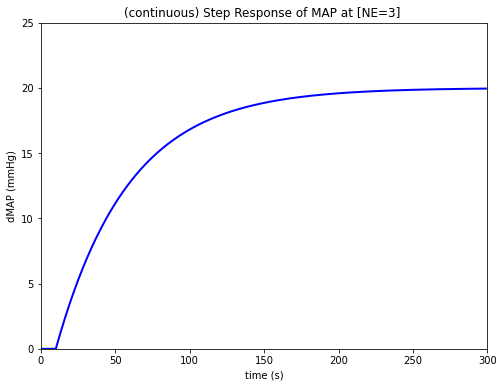

In [49]:
##  Approximate "Step Response dMAP" by using first-order delay system

TOTAL_SECOND = 5*60 # experiment 5 minutes
K = 20 # proportional gain [mmHg/(µg/kg/min)]
T = 49 # time constant (s)
L = 10 # pure time delay (s)

MAP_1 = [ K*(1 - np.exp(-(t-L)/T)) if t>=L else 0 for t in range(0, TOTAL_SECOND) ]

plt.figure(figsize=(8,6))
plt.plot(MAP_1, 'b', linewidth=2)
plt.xlim((0, TOTAL_SECOND))
plt.ylim((0, 25))
plt.xlabel('time (s)')
plt.ylabel('dMAP (mmHg)')
plt.title('(continuous) Step Response of MAP at [NE=3] ')

'''
Why when t<L --> MAP=0 ?
'''

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
[0, 1.360544217687075, 1.1093820483638952, 0.9045854689855727, 0.7375951971700206, 0.6014320299643887, 0.49040515455485856, 0.399874306042887, 0.3260558318935725, 0.26586455770030776, 0.21678484519256236, 0.1767654534762714, 0.14413380933024691, 0.1175261035654611, 0.09583029188961374, 0.07813961805118008, 0.06371471680601307, 0.05195271283526748, 0.042362024132688955, 0.03454181679229497, 0.028165252528426242, 0.022965828773863824, 0.0187262404531298, 0.015269297919155263, 0.012450521476933799, 0.010152102989170422, 0.008277982194855425, 0.006749831960081696, 0.005503784668400821, 0.004487762933250465, 0.003659303072063809]
31
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]


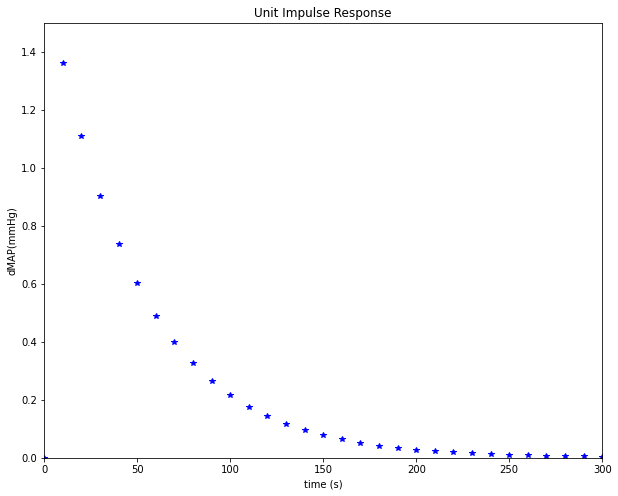

In [50]:
#################################
##### Unit Impulse Response  ####
#################################

TOTAL_SECOND = 5*60 # experiment 5 minutes
Ku = 20/3 # proportional gain [mmHg/(µg/kg/min)]
T = 49 # time constant (s)
L = 10 # pure time delay (s)
DELTA_T = 10 # sampling rate

RANGE_T = list(range(10, 301, 10))
RANGE_T.insert(0, 0)
print(RANGE_T)
MAP_2 = [ (Ku/T)*np.exp(-(t-L)/T)*DELTA_T if t>0 else 0 for t in RANGE_T ]

plt.figure(figsize=(10,8))
plt.plot(RANGE_T, MAP_2, 'b*')
plt.xlim((0, 300))
plt.ylim((0, 1.5))
plt.ylabel('dMAP(mmHg)')
plt.xlabel('time (s)')
plt.title('Unit Impulse Response')

'''
What is the purpose of Unit Impulse Response?
Slightly different with the Figure1B in paper?
'''
print(MAP_2)
print(len(MAP_2))
print(list(RANGE_T))

'\nCorrect or incorrect?\nHow can control the output range?\nWhy rabbits data do not use nonlinear model?\n'

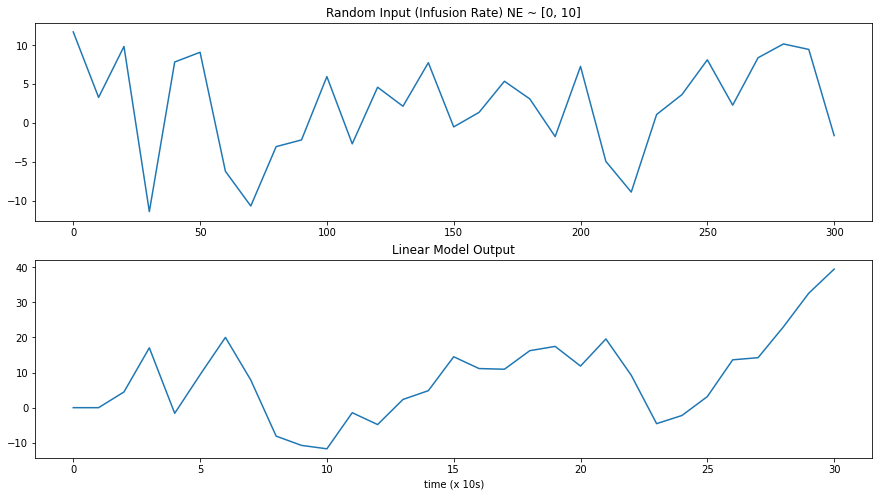

In [51]:
#################################
## MAP Response Model (Linear) ##
#################################

# Paramters
TOTAL_SECOND = 5*60
DELTA_T = 10
N = 30
K = 20
Ku = 20/3
T = 49
L = 10

RANGE_T = list(range(10, 301, 10))
RANGE_T.insert(0, 0) # [0, 10, 20, ..., 290, 300]
unit_impulse = [ (Ku/T)*np.exp(-(t-L)/T)*DELTA_T if t>0 else 0 for t in RANGE_T ]

# Function
def linear_model(u):
    """
    Input: u (infusion rate)
    Output: o*(t)
    """
    out_linear = []

    for t_index in range(0, len(u)):
        temp = 0
        for to in range(0, N+1):            
            if t_index <= to:
                u_delay = 0
            else:
                u_delay = u[t_index-to]

            temp += unit_impulse[to] * u_delay 
        
        out_linear.append(temp)
    
    return out_linear


# Random Inputs (infusion rate)
INPUT = []
for t in RANGE_T:
    INPUT.append(random.uniform(-12, 12))

# Plot
plt.figure(figsize=(15,8))

plt.subplot(211)
plt.plot(RANGE_T, INPUT)
plt.title('Random Input (Infusion Rate) NE ~ [0, 10]')

plt.subplot(212)
plt.plot(linear_model(u=INPUT))
plt.xlabel('time (x 10s)')
plt.title('Linear Model Output')

'''
Correct or incorrect?
How can control the output range?
Why rabbits data do not use nonlinear model?
'''


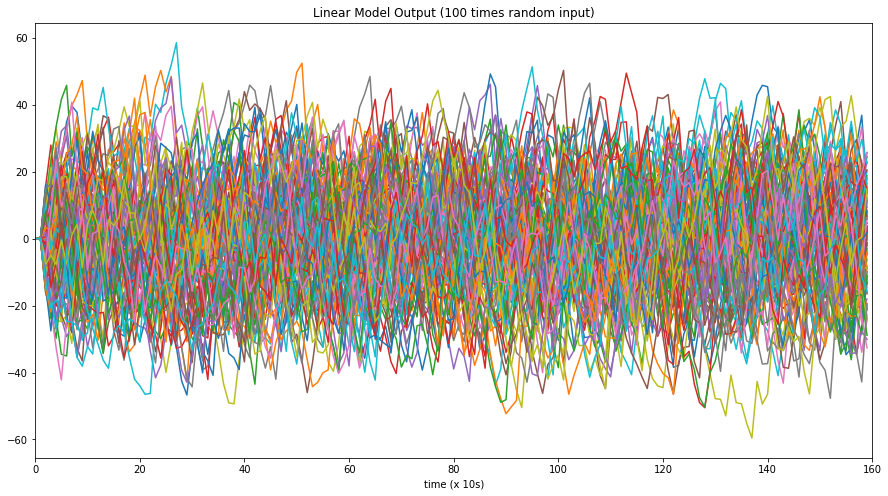

In [52]:
## Test Random 100 times 
plt.figure(figsize=(15,8))
for i in range(100):
    IR = []
    for t in range(0, 160):
        IR.append(random.uniform(-12, 12))

    plt.plot(linear_model(u=IR))
    plt.xlim((0, 160))
    plt.xlabel('time (x 10s)')
    plt.title('Linear Model Output (100 times random input)')